# Telco Customer Churn

# import libraries 

In [27]:
import os 
import pandas as pd 
import numpy as np
import seaborn as sns
import xgboost as xgb 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

# Takeaways 

Target feature:
- unbalanced target variable (73:27)but not enought to have to to imput data

# Steps for Exploration 

- Feature engineering (1)
- univariate exploration 
- bivariate exploration 
- outlier treatment 
- variable transformation
- variable creation 
- Feture engineering (2)

## Importing Data 

In [4]:
df = pd.read_csv('data/telco-customer-churn-clean-folds.csv')

In [5]:
df.head(5)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,k_fold
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   object 
 6   multiple_lines     7043 non-null   object 
 7   internet_service   7043 non-null   object 
 8   online_security    7043 non-null   object 
 9   online_backup      7043 non-null   object 
 10  device_protection  7043 non-null   object 
 11  tech_support       7043 non-null   object 
 12  streaming_tv       7043 non-null   object 
 13  streaming_movies   7043 non-null   object 
 14  contract           7043 non-null   object 
 15  paperless_billing  7043 non-null   object 
 16  payment_method     7043 

In [7]:
df.describe(include='all')

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,k_fold
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043,7043.000000
unique,2,NaN,2,2,NaN,2,3,3,3,3,...,3,3,3,3,2,4,NaN,NaN,2,NaN
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No,NaN
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,...,3473,2810,2785,3875,4171,2365,NaN,NaN,5174,NaN
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN,1.999574
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN,1.414264
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN,0.000000
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN,1.000000
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN,2.000000
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN,3.000000


In [87]:
df = df_orig.copy()

# Data prep

In [ ]:
df = df_orig.copy()

In [91]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [32]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

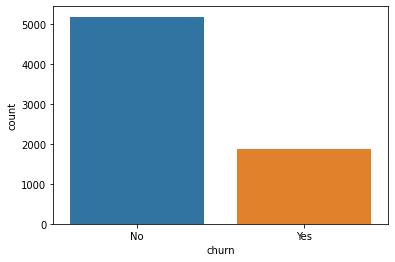

In [11]:
sns.countplot(data=df,x='churn')

## Checking to see all features have a significant count

In [33]:
categorical_variables = []
for x in df.select_dtypes(exclude = 'number').columns:
    categorical_variables.append(x)
    

categorical_variables.append('senior_citizen')
categorical_variables

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract',
 'paperless_billing',
 'payment_method',
 'churn',
 'senior_citizen']

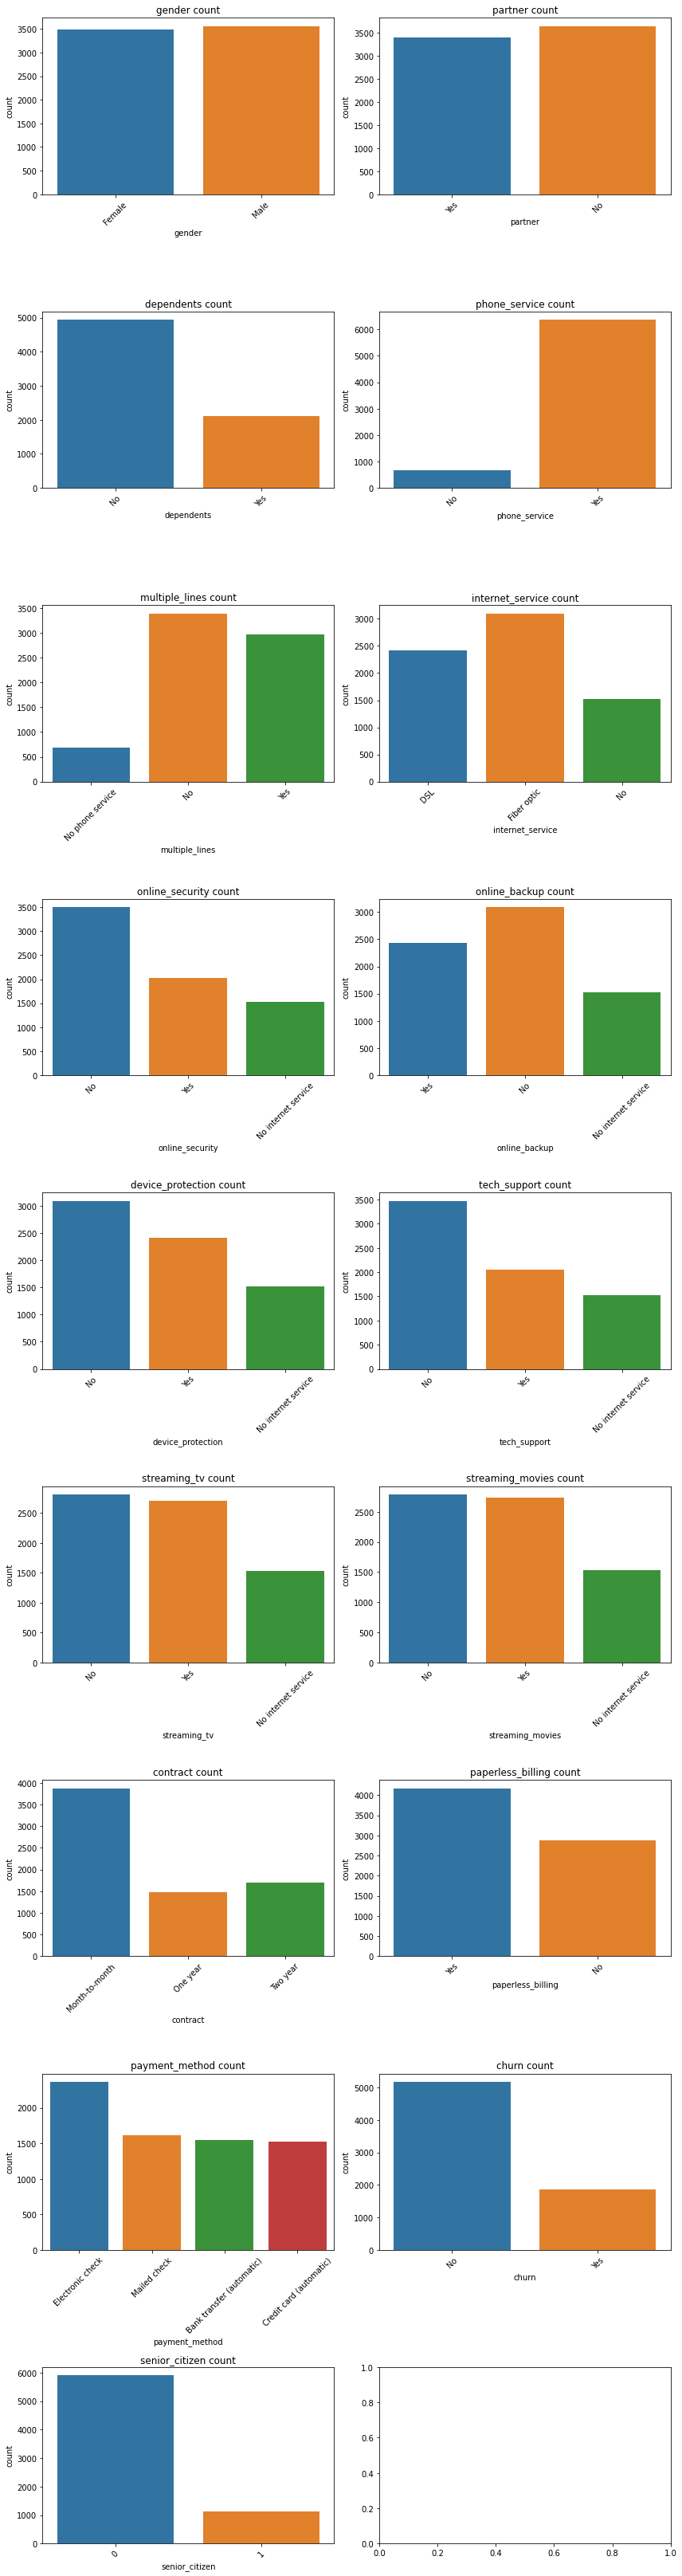

In [18]:
# row = 24 // 2 = 12 ... columns = 2 
n_rows, n_cols = (len(categorical_variables)+1)//2, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*5))
#fig.suptitle('Count Plots', fontsize=26)

for r in range(n_rows):
    for c in range(n_cols):
        try:
            i = r*n_cols+c
            ax = axs[r][c]
            sns.countplot(data=df, x = categorical_variables[i], ax=ax)
            ax.set_title(categorical_variables[i]+' count', fontsize=12)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
            fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
        except:
            break

# Bivariate analysis 

In [ ]:
df1 = 

<AxesSubplot:>

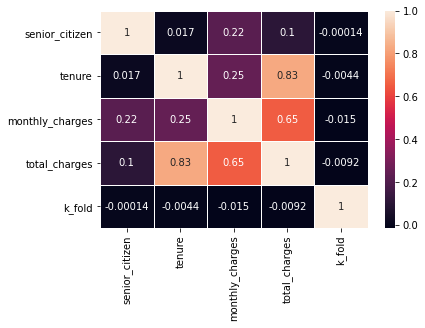

In [39]:
sns.heatmap(df.corr(),linewidths=1, linecolor='white',annot=True)